In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy
import mypy

In [3]:
from process import process
from process import fix_nan

### Обработка данных для финального обучения
Предпологается разбиение категориальных данных (товар и магазин) в one-hot ячейки
Так же будут полезны лаговые операторы.

In [4]:
raw_data = pd.read_csv("../data/train.csv")

In [5]:
# data = fix_nan(raw_data)
final = process(raw_data)
final

,Unnamed: 0,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,lag7_wdw7_pctl90,lag7_wdw7_mean,lag7_wdw7_median,...,store_location_rk_1191,store_location_rk_1202,store_location_rk_1203,store_location_rk_1281,store_location_rk_1316,store_location_rk_1326,store_location_rk_1328,store_location_rk_1347,store_location_rk_1363,store_location_rk_1380
0,0,2016-12-19,29.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-12-19,64.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-12-19,32.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-12-19,10.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-12-19,15.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35339,35537,2019-12-30,NaN,0.0,1000.00,1000.0,1.0,NaN,1.333333,1.0,...,0,0,0,0,0,0,0,0,0,1
35340,35538,2019-12-30,NaN,0.0,2000.00,2000.0,1.0,NaN,20.666667,20.0,...,0,0,0,0,0,0,0,0,0,1
35341,35539,2019-12-30,NaN,0.0,3000.00,3000.0,1.0,NaN,9.000000,9.0,...,0,0,0,0,0,0,0,0,0,1
35342,35540,2019-12-30,NaN,1.0,284.29,199.0,1.0,NaN,4.666667,5.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
data = raw_data.copy()

### Исследование полноты выборок и устранение возможной неполноты

In [17]:
print((data["period_start_dt"].max()-data["period_start_dt"].min())/7)
print("В нашем распоряжении 159 *недель* данных")
print("строк с потраченным спросом или ценой:")
print(data[np.isnan(data["demand"])].shape[0])
print(data[np.isnan(data["PRICE_REGULAR"])].shape[0])

data = data.dropna()
data



158 days 00:00:00
В нашем распоряжении 159 *недель* данных
строк с потраченным спросом или ценой:
1200
1127


,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
20,20,40369,317,2016-12-26,65.0,1.0,0.0,500.000000,500.000000,0.0,1.0
21,21,40370,317,2016-12-26,83.0,1.0,0.0,1000.000000,1000.000000,0.0,1.0
22,22,40372,317,2016-12-26,30.0,1.0,0.0,2000.000000,2000.000000,0.0,1.0
23,23,40373,317,2016-12-26,7.0,1.0,0.0,3000.000000,3000.000000,0.0,1.0
24,24,46272,317,2016-12-26,35.0,1.0,0.0,157.000000,157.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
35309,35507,40370,1380,2019-11-25,24.0,0.0,0.0,1000.000000,1000.000000,0.0,1.0
35310,35508,40372,1380,2019-11-25,11.0,0.0,0.0,2000.000000,2000.000000,0.0,1.0
35311,35509,40373,1380,2019-11-25,3.0,0.0,0.0,3000.000000,3000.000000,0.0,1.0
35312,35510,46272,1380,2019-11-25,0.0,1.0,0.0,284.290000,199.000000,0.0,1.0


#### Выбор частных полных данных по товару/магазину для проверки гипотез/обучения тестовых моделей

(150, 2)


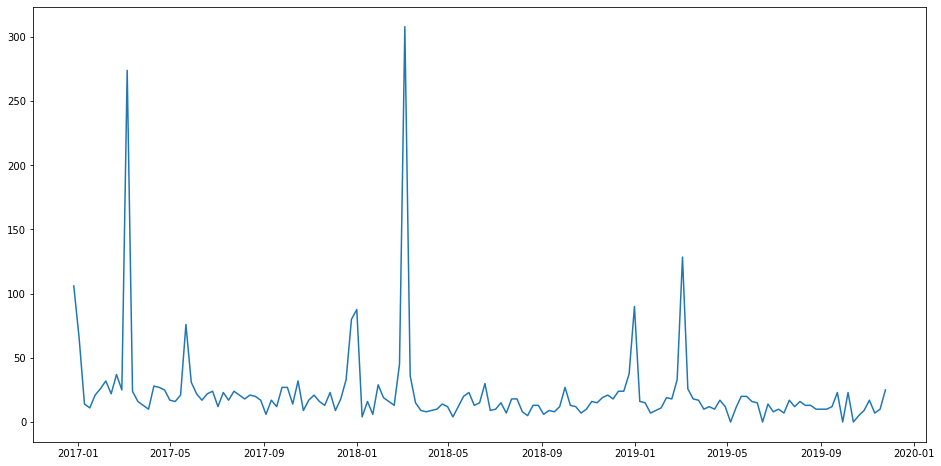

In [18]:
#выборка пар магазин-товар, данные спроса по которым не содержат пропуска
unique_items_grouped = data.groupby(["product_rk","store_location_rk"],as_index=False)
unique_items_sizes = unique_items_grouped.count()[["product_rk","store_location_rk","period_start_dt"]]
unique_items_sizes = pd.DataFrame(unique_items_sizes).rename(columns={"period_start_dt":"days in table"})

full_data_pairs = unique_items_sizes[unique_items_sizes["days in table"]==unique_items_sizes["days in table"].max()]
full_data_pairs = full_data_pairs.reset_index()[["product_rk","store_location_rk"]]

print(full_data_pairs.shape)

def get_local_data(number):
    if number<0 or number>=full_data_pairs.shape[0]:
        raise Exception("numer out of array ( from 0 to {})".format(full_data_pairs.shape[0]))
    product_rk,store_location_rk = full_data_pairs.loc[number]
    return data[(data["product_rk"] == product_rk)&(data["store_location_rk"]==store_location_rk)]
local_data = get_local_data(42)

plt.figure(figsize=(16,8))
plt.plot(local_data["period_start_dt"],local_data["demand"])
plt.show()

#### выбор суммарного спроса по товару

In [19]:
#print(full_data_pairs['product_rk'].unique)
def get_sum_demand_by_product(number):
    if number<0 or number>=full_data_pairs['product_rk'].unique().shape[0]:
        raise Exception("numer out of array ( from 0 to {})".format(full_data_pairs['product_rk'].unique().shape[0]))
    #print(list(full_data_pairs.groupby('product_rk'))[number][1])
    cur_product = full_data_pairs['product_rk'].unique()[number]
    shop_list = full_data_pairs[full_data_pairs['product_rk']==cur_product]['store_location_rk']
    cut_datalist = data[(data['store_location_rk'].isin(shop_list))&(data['product_rk']==cur_product)]
    return cut_datalist.groupby(['period_start_dt']).sum()[['demand','PROMO1_FLAG']].reset_index()
print(get_sum_demand_by_product(0).head(50))
def get_demands_by_product(number):
    if number<0 or number>=full_data_pairs['product_rk'].unique().shape[0]:
        raise Exception("numer out of array ( from 0 to {})".format(full_data_pairs['product_rk'].unique().shape[0]))
    #print(list(full_data_pairs.groupby('product_rk'))[number][1])
    cur_product = full_data_pairs['product_rk'].unique()[number]
    shop_list = full_data_pairs[full_data_pairs['product_rk']==cur_product]['store_location_rk']
    cut_datalist = data[(data['store_location_rk'].isin(shop_list))&(data['product_rk']==cur_product)]
    return (shop_list, cut_datalist.set_index('store_location_rk')[['period_start_dt','demand']].reset_index())
print(get_demands_by_product(4))

   period_start_dt        demand  PROMO1_FLAG
0       2016-12-26   2285.000000         30.0
1       2017-01-02   1286.655563         30.0
2       2017-01-09    335.000000          0.0
3       2017-01-16    283.420765          0.0
4       2017-01-23    246.000000          0.0
5       2017-01-30    322.000000          0.0
6       2017-02-06    335.000000          0.0
7       2017-02-13    481.000000          0.0
8       2017-02-20    584.000000          0.0
9       2017-02-27   2027.000000          0.0
10      2017-03-06  10346.000000          0.0
11      2017-03-13    493.398907          0.0
12      2017-03-20    308.557377          0.0
13      2017-03-27    305.267760          0.0
14      2017-04-03    214.841530          0.0
15      2017-04-10    246.442623          0.0
16      2017-04-17    309.000000          0.0
17      2017-04-24    334.322404          0.0
18      2017-05-01    299.000000          0.0
19      2017-05-08    220.000000          0.0
20      2017-05-15    365.000000  

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


### Исследование тренда товаров при помощи stl-декомпозиции

### Исследование применимости метода stl
Нас интересует сезонность по годам, т.к. крупные выбросы наблюдаются ~ каждый год, как и уравнение спроса
3 сезона довольно малое число информации для этого метода
Акции не учитывал, т.к. для всех товаров кроме 4го они почти что отсутствуют
ввиду специфики сглаживания алгоритма наблюдается опускание среднего уровня сезонности, поправил аддитивным сдвигом, что не сказывается на форме тренда
Существует проблема специфики алгоритма в виде нечётной длины окон, что плохо кореллирует с приблизительными длительностями года (52 недели) и месяца (4 недели). Предлагается произвести интерполяцию по дням, метод обдумывается. 

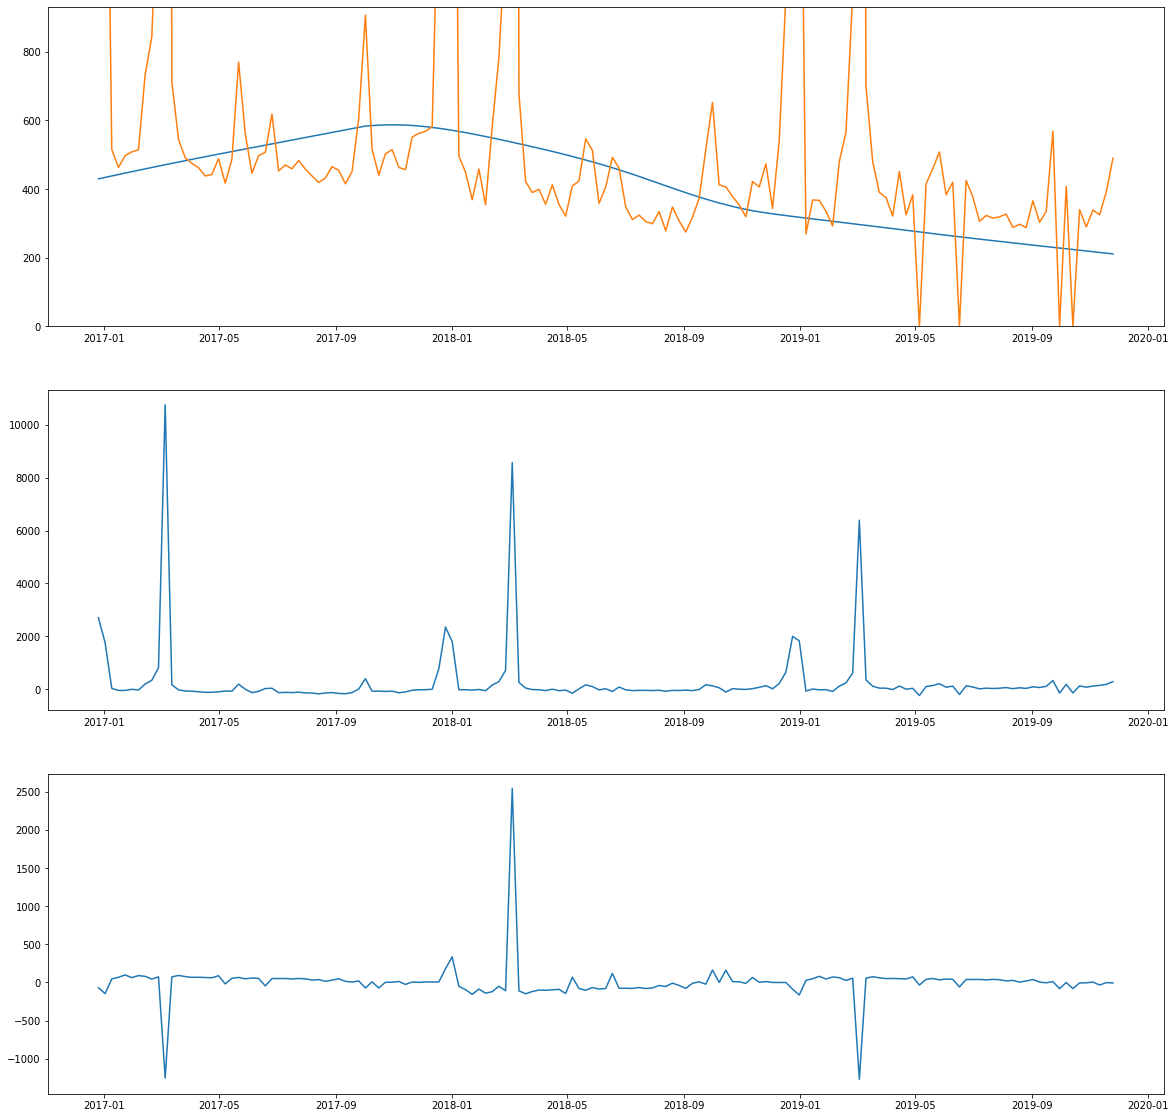

In [21]:
#
# поле эксперементов
# покоятся с миром 12 Алексеечасов
#
#############
df_base = []
for i in range(150):
    local_data = get_local_data(i)
    local_data_test = local_data.copy()
    local_data_test = local_data_test.set_index('period_start_dt')
    result = seasonal_decompose(local_data_test['demand'],model='additive')
    percent_change = (result.trend-result.trend.shift(1))/result.observed
    d = {}
    for val in [0.1,0.25,0.5,0.75,0.9]:
        d['prc_q_{}'.format(val)]=percent_change.quantile(val)
    d['diff'] = result.trend.max() - result.trend.min()
    d['prc_diff'] = (result.trend.dropna()[-1] - result.trend.dropna()[0])/result.trend.dropna()[0]
    df_base.append(d)
lcl = pd.DataFrame(df_base)
print(lcl)
########################

fig, axis = plt.subplots(3, figsize=(20,20))

local_data = get_sum_demand_by_product(1)
local_data_test = local_data.copy()
#local_data_test = local_data_test[local_data_test['period_start_dt']>'2017-05-01']
local_data_test = local_data_test.set_index('period_start_dt')
result = STL(local_data_test['demand'],seasonal=53).fit()
#plt.figure(figsize=(16,8))
axis[0].plot(result.trend.index,result.trend+np.median(result.seasonal))
axis[0].plot(local_data_test.index,local_data_test['demand'])
#plt.ylim((0,np.exp(result.trend.max()*1.1)))
axis[0].set_ylim(ymin=0,ymax=result.trend.max()*1.1)
axis[1].plot(result.trend.index,result.seasonal-np.median(result.seasonal))
axis[2].plot(result.trend.index,result.resid)


In [43]:
def STL_custom(train_data, target = 'demand', time_column = 'period_start_dt'):
    """
    return: tuple (trend, seasonal, resid, original data, date for x label)
    """
    local_data = train_data.copy()
    local_data = local_data.set_index(time_column)
    result = STL(local_data[target],seasonal=53).fit()
    return (result.trend+np.mean(result.seasonal), result.seasonal-np.mean(result.seasonal), result.resid, local_data[target], local_data.index)

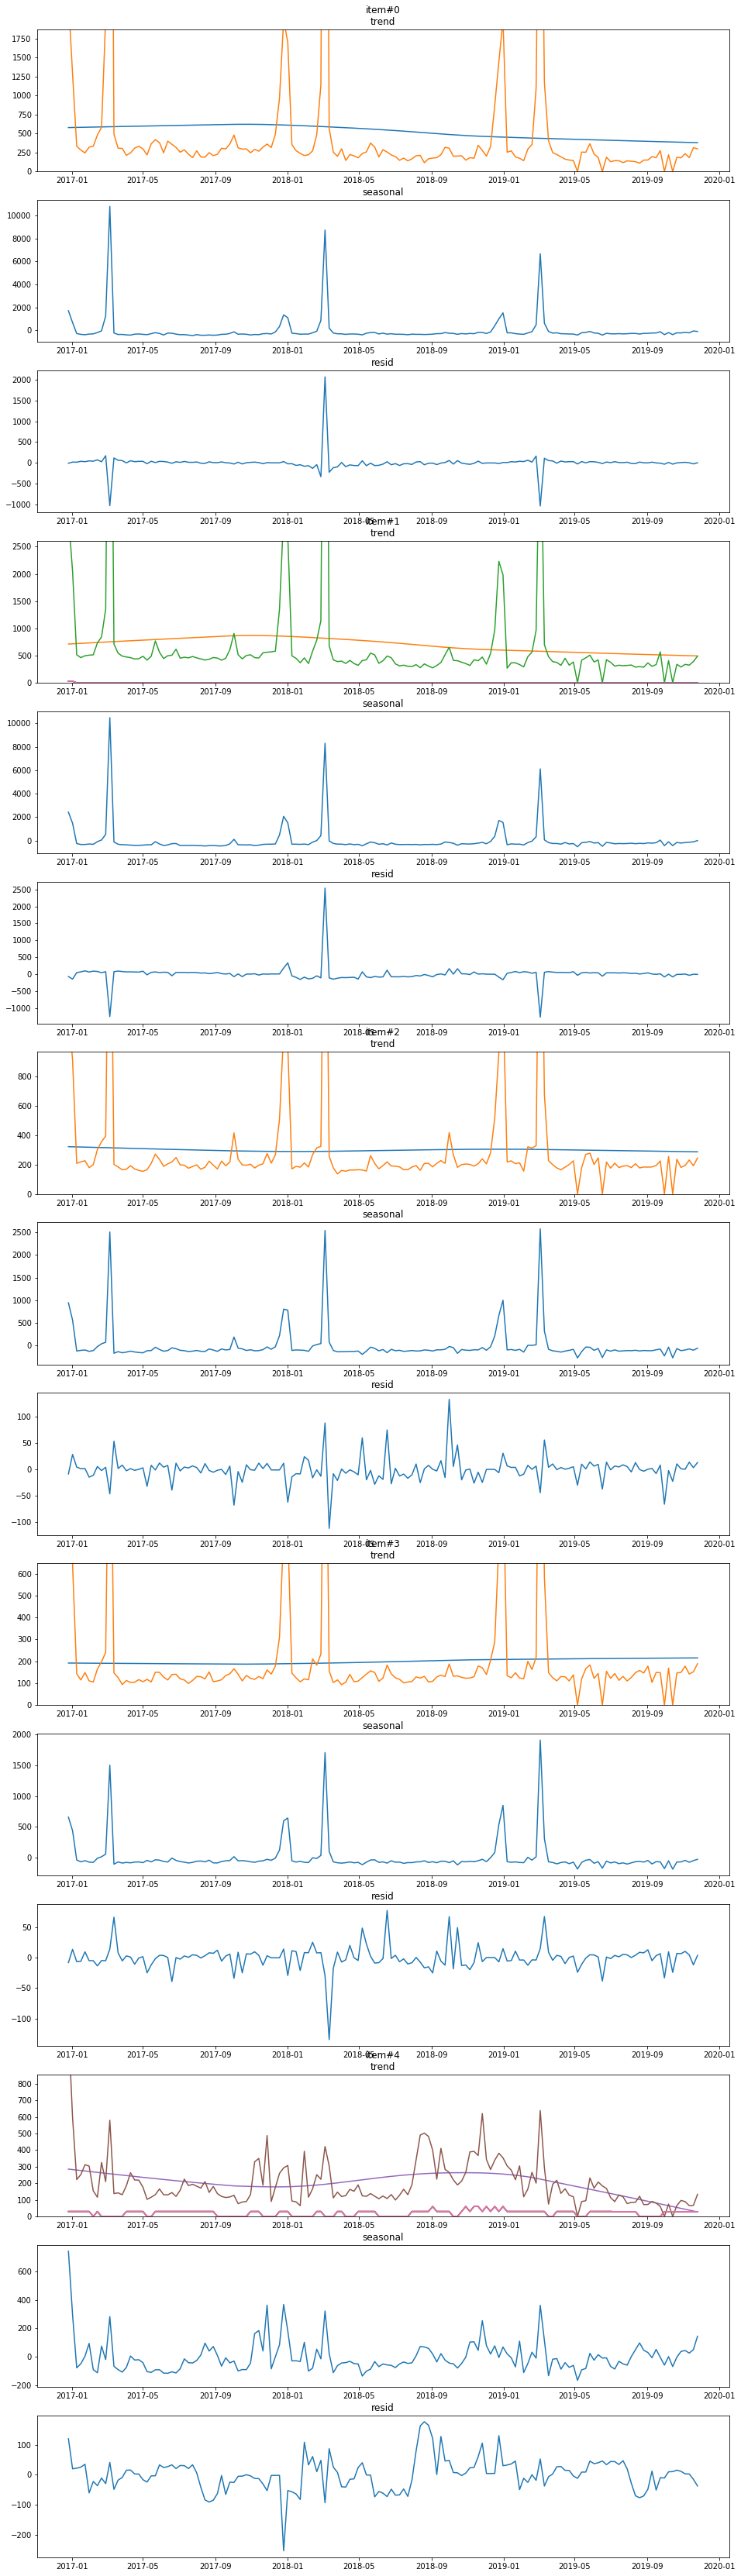

In [47]:
fig, axis = plt.subplots(15, figsize=(16,60))
for j in range(5):
    trend, seasonal,resid, demand, index = STL_custom(get_sum_demand_by_product(j))
    axis[3*j].plot(index,trend)
    axis[3*j].plot(index,demand)
    axis[3*j].set_ylim(ymin=0,ymax=trend.max()*3)
    axis[3*j].set_title('item#{}\ntrend'.format(j))
    axis[3*j+1].plot(index,seasonal)
    axis[3*j+1].set_title('seasonal')
    axis[3*j+2].plot(index,resid)
    axis[3*j+2].set_title('resid')
    
    axis[12].plot(index,get_sum_demand_by_product(4)['PROMO1_FLAG'])
    axis[3].plot(index,get_sum_demand_by_product(1)['PROMO1_FLAG'])
    
    
    

Высокое колебание тренда у 4 товара вызвано экспериментами с акциями на товар в 18 году. У остальных товаров изменения тренда не выявлено

#### Для каждого товара исследуем спрос для отдельных магазинов

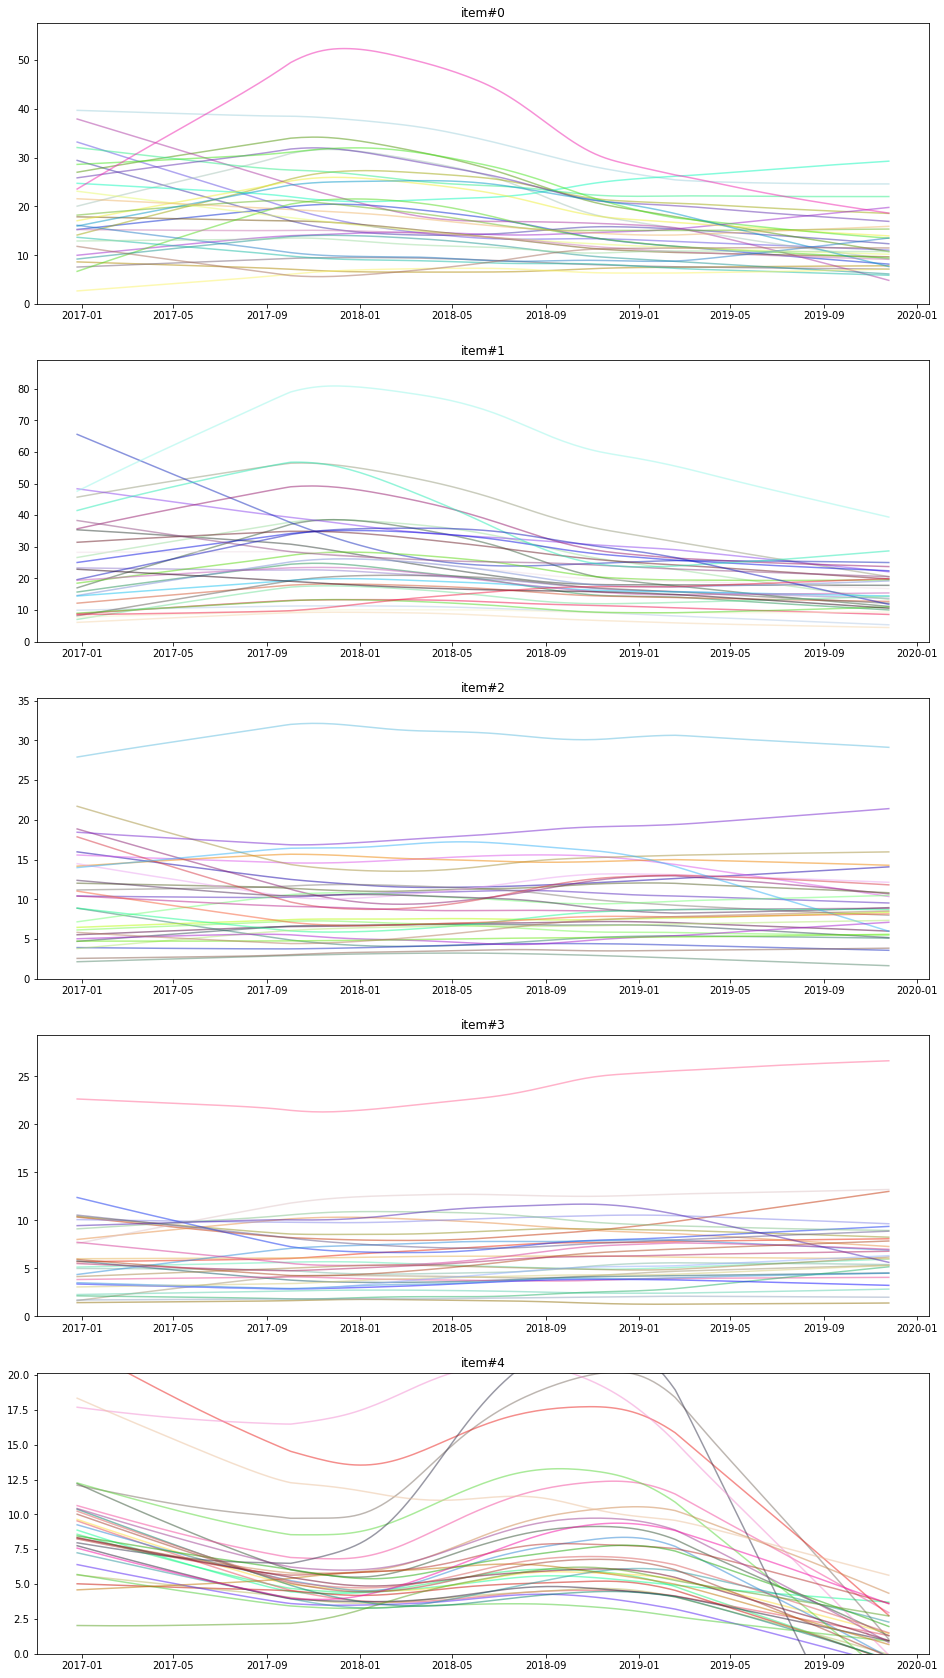

In [48]:
fig, axis = plt.subplots(15, figsize=(16,30))

for j in range(1):
    shop_name, shop_data = get_demands_by_product(j)
    axis[j].set_title('item#{}'.format(j))
    palette = {color: np.random.rand(3,) for color in shop_name}
    for name in shop_name:

        trend, seasonal,resid, demand, index = STL_custom(shop_data[shop_data['store_location_rk']==name])
        axis[j*3].plot(index,trend,color=palette[name],alpha=0.5)
        axis[j*3].set_ylim(ymin=0)
        axis[j*3].set_title('item#{}'.format(j))
        axis[j*3].set_ylim(ymin=0,ymax = trend.max()*1.1)
        axis[j*3+1].plot(index,seasonal)
        
    
    
    
    

#### Отсмотр данных по магазинам

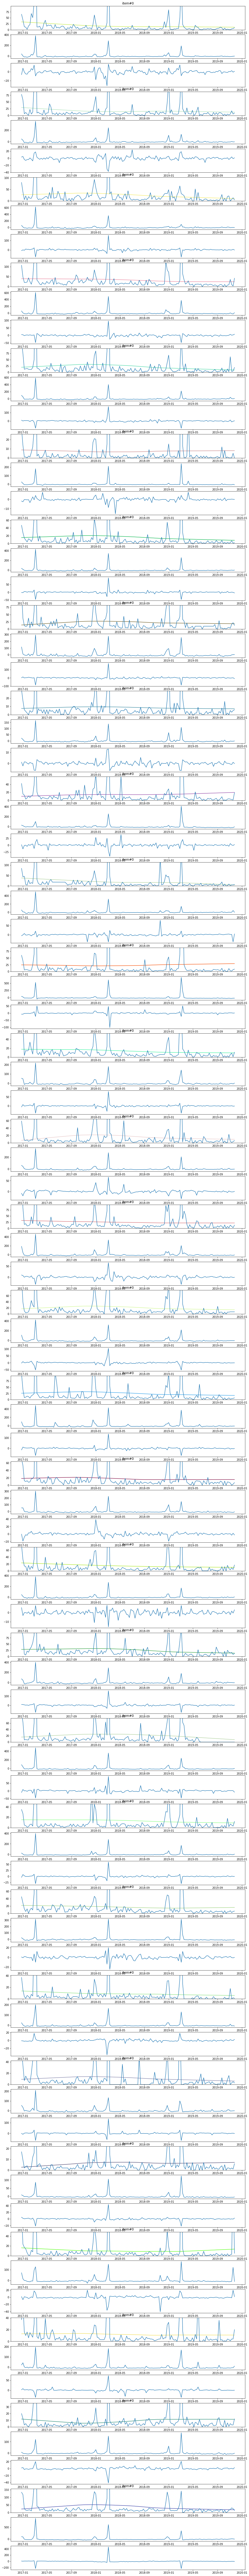

In [56]:
fig, axis = plt.subplots(30*3, figsize=(16,180))
test_item = 4
shop_name, shop_data = get_demands_by_product(j)
axis[j].set_title('item#{}'.format(test_item))
palette = {color: np.random.rand(3,) for color in shop_name}
for i, name in enumerate(shop_name):
    trend, seasonal,resid, demand, index = STL_custom(shop_data[shop_data['store_location_rk']==name])
    axis[i*3].plot(index,trend,color=palette[name])
    axis[i*3].plot(index,demand)
    axis[i*3].set_ylim(ymin=0)
    axis[i*3].set_title('item#{}'.format(j))
    axis[i*3].set_ylim(ymin=0,ymax = trend.max()*3)
    axis[i*3+1].plot(index,seasonal)
    axis[i*3+2].plot(index,resid)
        
    
    
    
    

В этом случае не так однозначно, есть магазины с разбросом тренда в 2 раза в разных годах, но по имеющимся данным сделать более комплексные данные сложно